In [53]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

from tensorflow import keras
from sklearn.preprocessing import StandardScaler

import plotly.graph_objects as go

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout, RepeatVector, TimeDistributed, Input
from tensorflow.keras import activations
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from scipy import fftpack

from tensorflow.math import confusion_matrix

In [2]:
data_1 = pd.read_csv('data/01.csv', sep=',')
data_2 = pd.read_csv('data/02.csv', sep=',')
data_3 = pd.read_csv('data/03.csv', sep=',')
data_4 = pd.read_csv('data/04.csv', sep=',')
data_5 = pd.read_csv('data/05.csv', sep=',')
data_6 = pd.read_csv('data/06.csv', sep=',')
data_7 = pd.read_csv('data/07.csv', sep=',')
data_8 = pd.read_csv('data/08.csv', sep=',')
data_9 = pd.read_csv('data/09.csv', sep=',')
data_10 = pd.read_csv('data/10.csv', sep=',')
data_11 = pd.read_csv('data/11.csv', sep=',')
data_12 = pd.read_csv('data/12.csv', sep=',')
data_13 = pd.read_csv('data/13.csv', sep=',')
data_14 = pd.read_csv('data/14.csv', sep=',')
data_15 = pd.read_csv('data/15.csv', sep=',')
data_16 = pd.read_csv('data/16.csv', sep=',')
data_17 = pd.read_csv('data/17.csv', sep=',')
data_18 = pd.read_csv('data/18.csv', sep=',')
data_19 = pd.read_csv('data/19.csv', sep=',')
data_20 = pd.read_csv('data/20.csv', sep=',')

data_1[['plety','ECG']] -= data_1[['plety','ECG']].mean() 
data_1[['plety','ECG']] /= data_1[['plety','ECG']].std()
data_2[['plety','ECG']] -= data_2[['plety','ECG']].mean() 
data_2[['plety','ECG']] /= data_2[['plety','ECG']].std()
data_3[['plety','ECG']] -= data_3[['plety','ECG']].mean() 
data_3[['plety','ECG']] /= data_3[['plety','ECG']].std()
data_4[['plety','ECG']] -= data_4[['plety','ECG']].mean() 
data_4[['plety','ECG']] /= data_4[['plety','ECG']].std()
data_5[['plety','ECG']] -= data_5[['plety','ECG']].mean() 
data_5[['plety','ECG']] /= data_5[['plety','ECG']].std()
data_6[['plety','ECG']] -= data_6[['plety','ECG']].mean() 
data_6[['plety','ECG']] /= data_6[['plety','ECG']].std()
data_7[['plety','ECG']] -= data_7[['plety','ECG']].mean() 
data_7[['plety','ECG']] /= data_7[['plety','ECG']].std()
data_8[['plety','ECG']] -= data_8[['plety','ECG']].mean() 
data_8[['plety','ECG']] /= data_8[['plety','ECG']].std()
data_9[['plety','ECG']] -= data_9[['plety','ECG']].mean() 
data_9[['plety','ECG']] /= data_9[['plety','ECG']].std()
data_10[['plety','ECG']] -= data_10[['plety','ECG']].mean() 
data_10[['plety','ECG']] /= data_10[['plety','ECG']].std()
data_11[['plety','ECG']] -= data_11[['plety','ECG']].mean() 
data_11[['plety','ECG']] /= data_11[['plety','ECG']].std()
data_12[['plety','ECG']] -= data_12[['plety','ECG']].mean() 
data_12[['plety','ECG']] /= data_12[['plety','ECG']].std()
data_13[['plety','ECG']] -= data_13[['plety','ECG']].mean() 
data_13[['plety','ECG']] /= data_13[['plety','ECG']].std()
data_14[['plety','ECG']] -= data_14[['plety','ECG']].mean() 
data_14[['plety','ECG']] /= data_14[['plety','ECG']].std()
data_15[['plety','ECG']] -= data_15[['plety','ECG']].mean() 
data_15[['plety','ECG']] /= data_15[['plety','ECG']].std()
data_16[['plety','ECG']] -= data_16[['plety','ECG']].mean() 
data_16[['plety','ECG']] /= data_16[['plety','ECG']].std()
data_17[['plety','ECG']] -= data_17[['plety','ECG']].mean() 
data_17[['plety','ECG']] /= data_17[['plety','ECG']].std()
data_18[['plety','ECG']] -= data_18[['plety','ECG']].mean() 
data_18[['plety','ECG']] /= data_18[['plety','ECG']].std()
data_19[['plety','ECG']] -= data_19[['plety','ECG']].mean() 
data_19[['plety','ECG']] /= data_19[['plety','ECG']].std()
data_20[['plety','ECG']] -= data_20[['plety','ECG']].mean() 
data_20[['plety','ECG']] /= data_20[['plety','ECG']].std()



In [3]:
a_peak = []
x_prime_peak = []

for i in range(1,7):
    # Specify the path to your text file
    file_path_a = "peaks/a_peak_{}.txt".format(i)
    # Specify the path to your text file
    file_path_x_prime = "peaks/x_prime_peak_{}.txt".format(i)

    # Read the contents of the file as a string
    with open(file_path_a, 'r') as file_a:
        a_content = file_a.read()
        
    # Read the contents of the file as a string
    with open(file_path_x_prime, 'r') as file_x_prime:
        x_prime_content = file_x_prime.read()

    # Remove the square brackets and split the string into individual elements
    a_elements = a_content.strip('[]').split(', ')
    x_prime_elements = x_prime_content.strip('[]').split(', ')

    # Convert the elements to integers
    a_peak.append(np.array(a_elements, dtype=int))
    x_prime_peak.append(np.array(x_prime_elements, dtype=int))

In [4]:
data_1['index_column'] = range(1, len(data_1) + 1)
data_2['index_column'] = range(1, len(data_2) + 1)
data_3['index_column'] = range(1, len(data_3) + 1)
data_4['index_column'] = range(1, len(data_4) + 1)
data_5['index_column'] = range(1, len(data_5) + 1)
data_6['index_column'] = range(1, len(data_6) + 1)
data_7['index_column'] = range(1, len(data_7) + 1)

# Create a new column 'artifacts' with values based on the given list
data_1['a_peak'] = np.where(data_1['index_column'].isin(a_peak[0]), 1, 0)
data_2['a_peak'] = np.where(data_2['index_column'].isin(a_peak[1]), 1, 0)
data_3['a_peak'] = np.where(data_3['index_column'].isin(a_peak[2]), 1, 0)
data_4['a_peak'] = np.where(data_4['index_column'].isin(a_peak[3]), 1, 0)
data_5['a_peak'] = np.where(data_5['index_column'].isin(a_peak[4]), 1, 0)
data_6['a_peak'] = np.where(data_6['index_column'].isin(a_peak[5]), 1, 0)
data_7['a_peak'] = np.where(data_7['index_column'].isin(a_peak[6]), 1, 0)

# Create a new column 'artifacts' with values based on the given list
data_1['x_prime_peak'] = np.where(data_1['index_column'].isin(x_prime_peak[0]), 1, 0)
data_2['x_prime_peak'] = np.where(data_2['index_column'].isin(x_prime_peak[1]), 1, 0)
data_3['x_prime_peak'] = np.where(data_3['index_column'].isin(x_prime_peak[2]), 1, 0)
data_4['x_prime_peak'] = np.where(data_4['index_column'].isin(x_prime_peak[3]), 1, 0)
data_5['x_prime_peak'] = np.where(data_5['index_column'].isin(x_prime_peak[4]), 1, 0)
data_6['x_prime_peak'] = np.where(data_6['index_column'].isin(x_prime_peak[5]), 1, 0)
data_7['x_prime_peak'] = np.where(data_7['index_column'].isin(x_prime_peak[6]), 1, 0)

In [5]:
df = pd.DataFrame()
df = df.append(data_1) 
df = df.append(data_2) 
df = df.append(data_3) 
df = df.append(data_4) 
df = df.append(data_5) 
df = df.append(data_6)
df = df.append(data_7)
df['indx'] = range(1, len(df) + 1)

In [6]:
df

,time,plety,ECG,Patient ID,index_column,a_peak,x_prime_peak,indx
0,0.000000,-0.037000,1.294023,1,1,0,0,1
1,0.015003,-0.029710,1.294023,1,2,0,0,2
2,0.030007,-0.040663,0.846229,1,3,0,0,3
3,0.045010,-0.077865,0.696966,1,4,0,0,4
4,0.060013,-0.141235,1.144759,1,5,0,0,5
...,...,...,...,...,...,...,...,...
3776,56.654956,-0.591527,-0.219767,6,3777,0,0,22610
3777,56.669960,-0.496703,-0.102299,6,3778,0,0,22611
3778,56.684964,-0.417816,-0.219767,6,3779,0,0,22612
3779,56.699968,-0.365894,-0.196274,6,3780,0,0,22613


# Peak detection with NN
### We tried to build a NN able to detect as many peak as possibile of the typical 6 peaks present in a pletysmography complete cycle. The algorithm was based on supervised learning, with labeled data by hand.

In [242]:
train = df[(df['Patient ID']<=5)].copy()
test = df[df['Patient ID']==6].copy()
data = pd.DataFrame()

train = train.drop(['time','Patient ID','index_column','indx','x_prime_peak'], axis=1)
test = test.drop(['time','Patient ID','index_column','indx','x_prime_peak'], axis=1)

data = pd.concat([data, train])
data = pd.concat([data, test])
data = np.column_stack((data['plety'], data['ECG'], data['a_peak']))

sequence_length = 30
# create input/output sequences for LSTM
X = []
y = []
for i in range(len(data) - sequence_length):
    X.append(data[i:i+sequence_length, [0,1]])
    y.append(data[i:i+sequence_length, 2])
X = np.array(X)
y = np.array(y)

train_size = int(len(train))
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

X_train = X_train[np.sum(y_train, axis=1) == 1]
y_train = y_train[np.sum(y_train, axis=1) == 1]

# X_test = X_test[np.sum(y_test, axis=1) == 1]
# y_test = y_test[np.sum(y_test, axis=1) == 1]

permutation_train = np.random.permutation(X_train.shape[0])
X_train= X_train[permutation_train]
y_train = y_train[permutation_train]

print(f'Training shape: {X_train.shape}')
print(f'Testing shape: {X_test.shape}')

Training shape: (8686, 30, 2)
Testing shape: (3751, 30, 2)


In [243]:
input_shape = (sequence_length, 2)

print(input_shape)

fc_size = sequence_length

input_data = keras.layers.Input(shape=input_shape, name='input0')

conv1 = keras.layers.Conv1D(sequence_length, 5 , activation='relu',input_shape=input_shape[1:])(input_data)

pool1 = keras.layers.MaxPooling1D(pool_size=2, strides=None, padding='valid', 
                                  data_format='channels_last', name='pool1')(conv1)

conv2 = keras.layers.Conv1D( int(sequence_length/2 ) , 2, activation='relu',input_shape=input_shape[1:])(pool1)

pool2 = keras.layers.MaxPooling1D(pool_size=2, strides=None, padding='valid', data_format='channels_last', name='pool2')(conv2)

flat = keras.layers.Flatten()(pool2)

fc0 = keras.layers.Dense(128, activation=tf.nn.relu,  kernel_initializer='glorot_uniform', bias_initializer='zeros', name='fc0')(flat)

drop2 = keras.layers.Dropout(0.2)

output = keras.layers.Dense(sequence_length, activation=tf.nn.sigmoid, 
                            kernel_initializer='glorot_uniform', bias_initializer='zeros', name='output')(fc0)

model = keras.models.Model(inputs=[input_data], outputs=[output])

model.summary()

(30, 2)
Model: "model_15"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input0 (InputLayer)         [(None, 30, 2)]           0         
                                                                 
 conv1d_33 (Conv1D)          (None, 26, 30)            330       
                                                                 
 pool1 (MaxPooling1D)        (None, 13, 30)            0         
                                                                 
 conv1d_34 (Conv1D)          (None, 12, 15)            915       
                                                                 
 pool2 (MaxPooling1D)        (None, 6, 15)             0         
                                                                 
 flatten_15 (Flatten)        (None, 90)                0         
                                                                 
 fc0 (Dense)                 (None, 128)          

In [244]:
adam = keras.optimizers.Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999)

model.compile(optimizer=adam,
              loss='binary_crossentropy',
              metrics=['FalsePositives'])

history = model.fit(X_train, y_train, epochs=300, validation_split = 0.2)

Epoch 1/300
218/218 [==============================] - 2s 4ms/step - loss: 0.1832 - false_positives: 2474.0000 - val_loss: 0.1230 - val_false_positives: 0.0000e+00
Epoch 2/300
218/218 [==============================] - 1s 3ms/step - loss: 0.1146 - false_positives: 16.0000 - val_loss: 0.1099 - val_false_positives: 17.0000
Epoch 3/300
218/218 [==============================] - 1s 3ms/step - loss: 0.1041 - false_positives: 72.0000 - val_loss: 0.1021 - val_false_positives: 19.0000
Epoch 4/300
218/218 [==============================] - 1s 3ms/step - loss: 0.0971 - false_positives: 154.0000 - val_loss: 0.0965 - val_false_positives: 41.0000
Epoch 5/300
218/218 [==============================] - 1s 3ms/step - loss: 0.0919 - false_positives: 229.0000 - val_loss: 0.0913 - val_false_positives: 69.0000
Epoch 6/300
218/218 [==============================] - 1s 3ms/step - loss: 0.0877 - false_positives: 322.0000 - val_loss: 0.0871 - val_false_positives: 76.0000
Epoch 7/300
218/218 [=================

In [252]:
pred_y = model.predict(X_test)


118/118 [==============================] - 0s 1ms/step


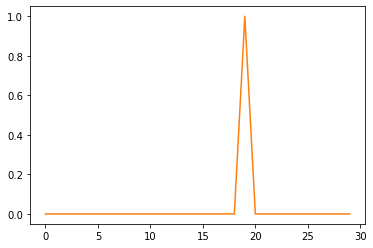

In [253]:
c = 9

plt.plot(y_test[sequence_length*c])
plt.plot(pred_y[sequence_length*c])

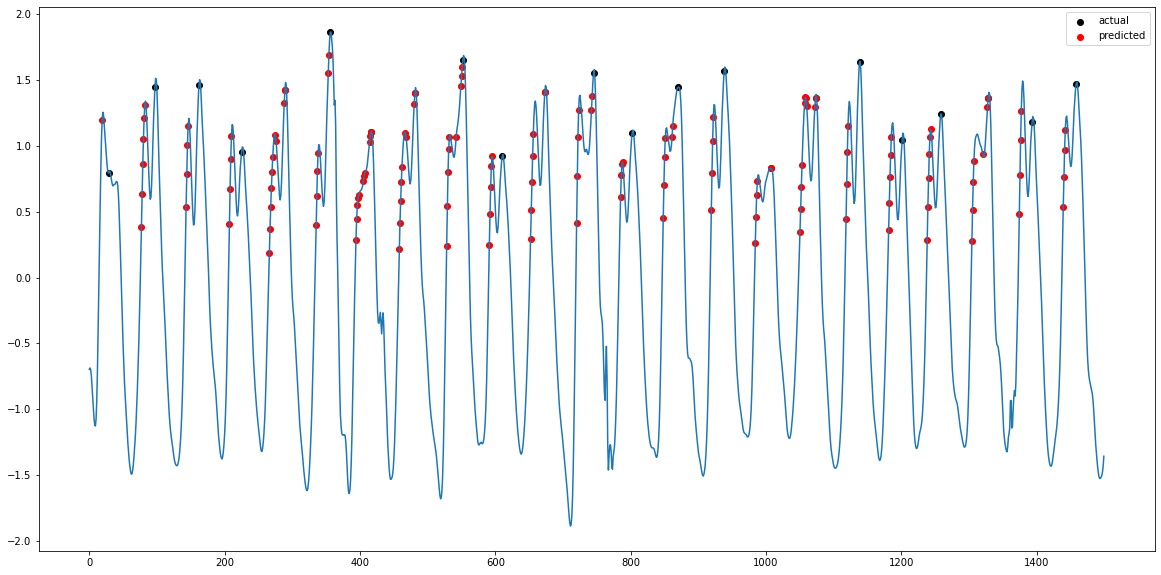

In [255]:
# Get the plethysmographic data and remove the last element for shape purposes
plety = test['plety'].iloc[:-1]


# Calculate actual peak values from the test data
actual_values = plety[test['a_peak']==1]

# Calculate the indeces where the actual values are present 
# so that we can plot the point from the test at that index
indices = actual_values.index

# Calculate the predictions:
# We have 3700+ sequences of 60 points
# The first sequence of 60 points is saved in the predictions array
# for each one of the net sequences we save the last element to the array
# we end up with a prediction array with all the predicted values for each plety index value
predictions = np.array([])

for ind, i in enumerate(pred_y):
    if ind == 0:
        predictions = np.append(predictions, pred_y[ind])
    else:
        predictions = np.append(predictions, pred_y[ind][-1])
        
# Calculate the indeces where the predicted values are present 
# so that we can plot the point from the test at that index
indices_pred = np.where(np.isin(predictions, predictions[predictions>0.5]))[0]

range_min = 0
range_max = 1500

# Set the figure size
plt.figure(figsize=(20, 10))

# Plotting code
# Plot the plety data
plt.plot(plety[range_min:range_max])

# Plot the points from the plety where actual values have a peak, (==1)
plt.scatter(np.array(indices[indices<range_max]), actual_values[range_min:len(np.array(indices[indices<range_max]))], c="black", label='actual')

# Plot the points from the plety where predicted values have a peak, (==1)
plt.scatter(np.array(indices_pred[indices_pred<range_max]), plety[indices_pred][range_min:len(np.array(indices_pred[indices_pred<range_max]))],c="red", label='predicted')

# Display the legend
plt.legend()

plt.show()

In [248]:
pred_y = model.predict(X_test) > 0.5

118/118 [==============================] - 0s 1ms/step


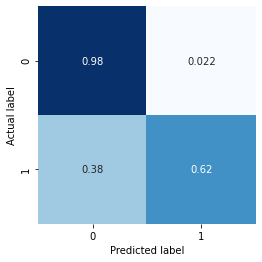

In [249]:
import seaborn as sns

y_test = y_test.flatten()
pred_y = pred_y.flatten()

mat = np.array(confusion_matrix(y_test, pred_y), dtype=float)
mat[0,0] = mat[0,0]/len(y_test[y_test == 0])
mat[1,1] = mat[1,1]/len(y_test[y_test == 1])

mat[0,1] = mat[0,1]/len(y_test[y_test == 0])
mat[1,0] = mat[1,0]/len(y_test[y_test == 1])
labels = ['0', '1']

sns.heatmap(mat, square=True, annot=True, cbar=False, cmap='Blues',
            xticklabels=labels, yticklabels=labels)
 
plt.xlabel('Predicted label')
plt.ylabel('Actual label')
plt.show()

## X_prime

In [230]:
train = df[(df['Patient ID']<=5)].copy()
test = df[df['Patient ID']==6].copy()
data = pd.DataFrame()

train = train.drop(['time','Patient ID','index_column','indx','a_peak'], axis=1)
test = test.drop(['time','Patient ID','index_column','indx','a_peak'], axis=1)

data = pd.concat([data, train])
data = pd.concat([data, test])
data = np.column_stack((data['plety'], data['ECG'], data['x_prime_peak']))

sequence_length = 30
# create input/output sequences for LSTM
X = []
y = []
for i in range(len(data) - sequence_length):
    X.append(data[i:i+sequence_length, [0,1]])
    y.append(data[i:i+sequence_length, 2])
X = np.array(X)
y = np.array(y)

train_size = int(len(train))
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

X_train = X_train[np.sum(y_train, axis=1) == 1]
y_train = y_train[np.sum(y_train, axis=1) == 1]

# X_test = X_test[np.sum(y_test, axis=1) == 1]
# y_test = y_test[np.sum(y_test, axis=1) == 1]

permutation_train = np.random.permutation(X_train.shape[0])
X_train= X_train[permutation_train]
y_train = y_train[permutation_train]

print(f'Training shape: {X_train.shape}')
print(f'Testing shape: {X_test.shape}')

Training shape: (8642, 30, 2)
Testing shape: (3751, 30, 2)


In [231]:
input_shape = (sequence_length, 2)

print(input_shape)

fc_size = sequence_length

input_data = keras.layers.Input(shape=input_shape, name='input0')

conv1 = keras.layers.Conv1D(sequence_length, 5 , activation='relu',input_shape=input_shape[1:])(input_data)

pool1 = keras.layers.MaxPooling1D(pool_size=2, strides=None, padding='valid', 
                                  data_format='channels_last', name='pool1')(conv1)

conv2 = keras.layers.Conv1D( int(sequence_length/2 ) , 2, activation='relu',input_shape=input_shape[1:])(pool1)

pool2 = keras.layers.MaxPooling1D(pool_size=2, strides=None, padding='valid', data_format='channels_last', name='pool2')(conv2)

flat = keras.layers.Flatten()(pool2)

fc0 = keras.layers.Dense(128, activation=tf.nn.relu,  kernel_initializer='glorot_uniform', bias_initializer='zeros', name='fc0')(flat)

drop2 = keras.layers.Dropout(0.2)

output = keras.layers.Dense(sequence_length, activation=tf.nn.sigmoid, 
                            kernel_initializer='glorot_uniform', bias_initializer='zeros', name='output')(fc0)

model = keras.models.Model(inputs=[input_data], outputs=[output])

model.summary()

(30, 2)
Model: "model_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input0 (InputLayer)         [(None, 30, 2)]           0         
                                                                 
 conv1d_31 (Conv1D)          (None, 26, 30)            330       
                                                                 
 pool1 (MaxPooling1D)        (None, 13, 30)            0         
                                                                 
 conv1d_32 (Conv1D)          (None, 12, 15)            915       
                                                                 
 pool2 (MaxPooling1D)        (None, 6, 15)             0         
                                                                 
 flatten_14 (Flatten)        (None, 90)                0         
                                                                 
 fc0 (Dense)                 (None, 128)          

In [232]:
adam = keras.optimizers.Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999)

model.compile(optimizer=adam,
              loss='binary_crossentropy',
              metrics=['FalsePositives'])

history = model.fit(X_train, y_train, epochs=300, validation_split = 0.2)

Epoch 1/300
217/217 [==============================] - 2s 5ms/step - loss: 0.1814 - false_positives: 2871.0000 - val_loss: 0.1161 - val_false_positives: 1.0000
Epoch 2/300
217/217 [==============================] - 1s 3ms/step - loss: 0.1087 - false_positives: 38.0000 - val_loss: 0.1030 - val_false_positives: 26.0000
Epoch 3/300
217/217 [==============================] - 1s 3ms/step - loss: 0.0988 - false_positives: 135.0000 - val_loss: 0.0940 - val_false_positives: 23.0000
Epoch 4/300
217/217 [==============================] - 1s 3ms/step - loss: 0.0914 - false_positives: 245.0000 - val_loss: 0.0879 - val_false_positives: 97.0000
Epoch 5/300
217/217 [==============================] - 1s 3ms/step - loss: 0.0858 - false_positives: 386.0000 - val_loss: 0.0833 - val_false_positives: 152.0000
Epoch 6/300
217/217 [==============================] - 1s 3ms/step - loss: 0.0812 - false_positives: 525.0000 - val_loss: 0.0791 - val_false_positives: 113.0000
Epoch 7/300
217/217 [==================

In [233]:
pred_y = model.predict(X_test)


118/118 [==============================] - 0s 1ms/step


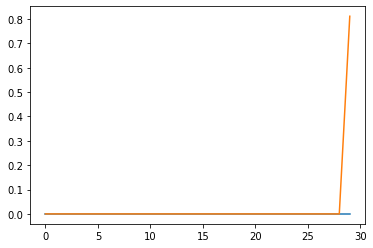

In [234]:
c= 5

plt.plot(y_test[sequence_length*c])
plt.plot(pred_y[sequence_length*c])

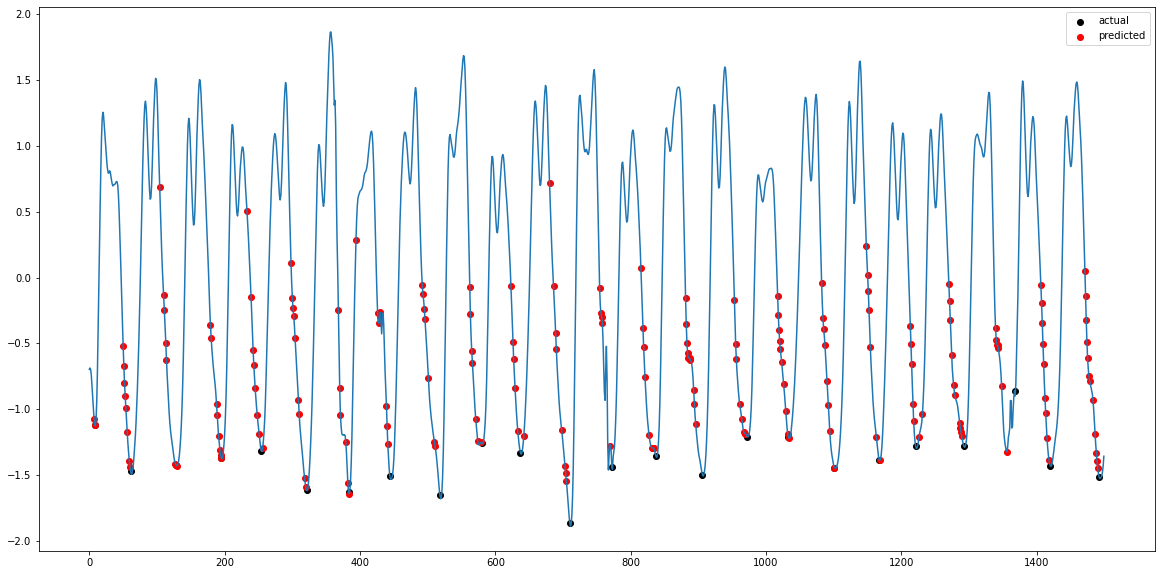

In [235]:
# Get the plethysmographic data and remove the last element for shape purposes
plety = test['plety'].iloc[:-1]


# Calculate actual peak values from the test data
actual_values = plety[test['x_prime_peak']==1]

# Calculate the indeces where the actual values are present 
# so that we can plot the point from the test at that index
indices = actual_values.index

# Calculate the predictions:
# We have 3700+ sequences of 60 points
# The first sequence of 60 points is saved in the predictions array
# for each one of the net sequences we save the last element to the array
# we end up with a prediction array with all the predicted values for each plety index value
predictions = np.array([])

for ind, i in enumerate(pred_y):
    if ind == 0:
        predictions = np.append(predictions, pred_y[ind])
    else:
        predictions = np.append(predictions, pred_y[ind][-1])
        
# Calculate the indeces where the predicted values are present 
# so that we can plot the point from the test at that index
indices_pred = np.where(np.isin(predictions, predictions[predictions>0.1]))[0]

range_min = 0
range_max = 1500

# Set the figure size
plt.figure(figsize=(20, 10))

# Plotting code
# Plot the plety data
plt.plot(plety[range_min:range_max])

# Plot the points from the plety where actual values have a peak, (==1)
plt.scatter(np.array(indices[indices<range_max]), actual_values[range_min:len(np.array(indices[indices<range_max]))], c="black", label='actual')

# Plot the points from the plety where predicted values have a peak, (==1)
plt.scatter(np.array(indices_pred[indices_pred<range_max]), plety[indices_pred][range_min:len(np.array(indices_pred[indices_pred<range_max]))],c="red", label='predicted')

# Display the legend
plt.legend()

plt.show()


In [236]:
pred_y = model.predict(X_test) > 0.5

118/118 [==============================] - 0s 1ms/step


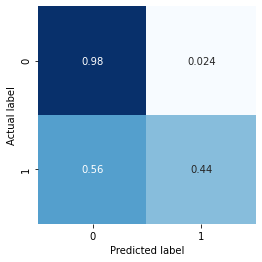

In [237]:
import seaborn as sns

y_test = y_test.flatten()
pred_y = pred_y.flatten()

mat = np.array(confusion_matrix(y_test, pred_y), dtype=float)
mat[0,0] = mat[0,0]/len(y_test[y_test == 0])
mat[1,1] = mat[1,1]/len(y_test[y_test == 1])

mat[0,1] = mat[0,1]/len(y_test[y_test == 0])
mat[1,0] = mat[1,0]/len(y_test[y_test == 1])
labels = ['0', '1']

sns.heatmap(mat, square=True, annot=True, cbar=False, cmap='Blues',
            xticklabels=labels, yticklabels=labels)
 
plt.xlabel('Predicted label')
plt.ylabel('Actual label')
plt.show()